# Gráficos

## Librería Plots

La librería Plots permite realizar gráficos y animaciones en Julia. Para importarla corremos `using Plots`

In [3]:
#===================================================================================
using Pkg
Pkg.add("Plots")    #Recuerde correr estas líneas si no tiene Plots instalada
====================================================================================#

using Plots

### La función `plot`
La función más importante de la librería es es la función `plot`. La sintaxis básica para obtener gráficos es `plot(x,y)`, donde, al igual que en otros lenguajes, `x` e `y` son series de datos. Este es un ejemplo sencillo:

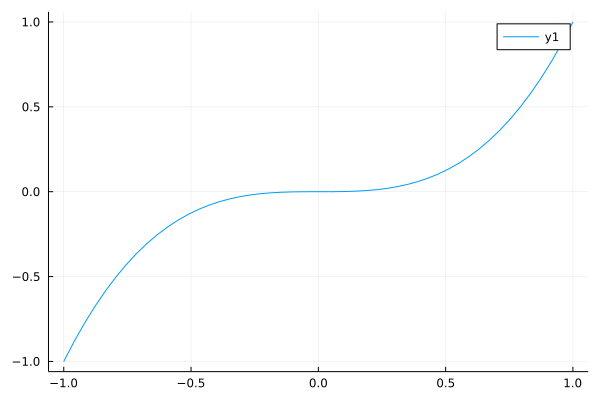

In [4]:
x = range(-1,1,length=50)   #El rango (-1,1) con 50 puntos equiespaciados

y = x.^3                    #Aplicamos la función cubo a cada elemento de x

plot(x, y)

También podemos pasar como segundo argumento una función, y `Julia` hará un mapeo para poder plotearla

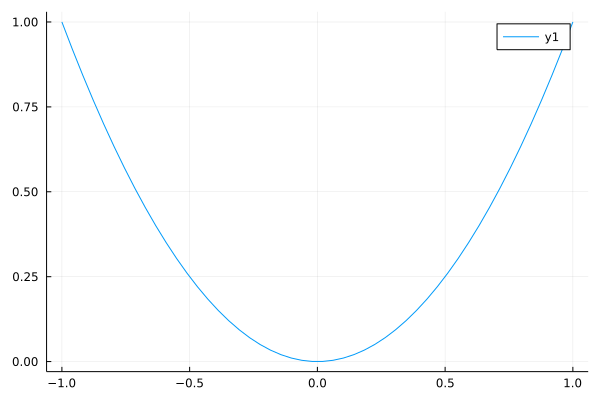

In [5]:
plot(x, x -> x^2)         #Como segundo argumento pasamos una función lambda

### Cómo hacer varios gráficos a la vez:

Para disponer varias curvas en el mismo gráfico, podemos dar también un arreglo cuyas columnas sean las distintas series de datos a visualizar:

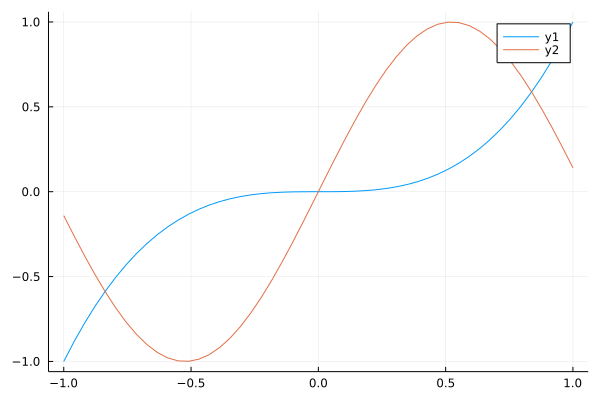

In [9]:
y = zeros(50,2)  # Creamos un arreglo de dos columnas lleno de ceros

y[:,1] = x.^3
y[:,2] = sin.(3*x)

plot(x,y)

También podemos utilizar la función modificatoria `plot!`, que, de acuerdo a la convención de Julia sobre el símbolo `!`, agregará la curva sobre el gráfico activo. 

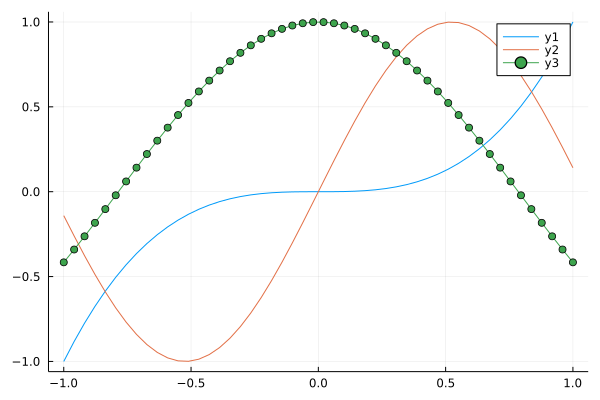

In [10]:
z = cos.(2*x)

plot!(x,z, marker = :circle)  #Esta función agrega un gráfico sobre el último plot activo.
                              #Agregando el argumento marker podemos hacer una línea punteada

Podemos cambiar el estilo de gráfico de líneas a puntos usando el comando `scatter` en vez de `plot`.

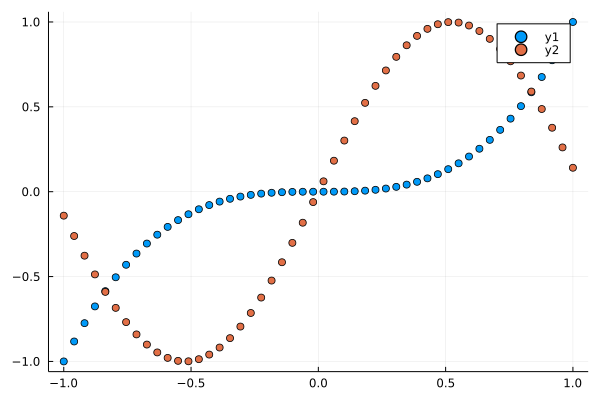

In [11]:
scatter(x,y)
#scatter(x,y) es equivalente a escribir 'plot(x,y, seriestype = :scatter)'

Esto es equivalente a `plot(x,y,seriestype = :scatter)`

### Atributos: cómo agregar más cosas al gráfico

Los gráficos tienen varios _atributos_ que permiten estilizarlos, como el título, las etiquetas de los ejes, las leyendas, el ancho de la línea, etc. Los atributos ingresan a la función como argumentos de tipo keyword, es decir, de la forma `plot(x,y,atributo=valor)`. La lista completa de los atributos puede encontarse en la [documentación del paquete](https://docs.juliaplots.org/latest/generated/attributes_series/). 

Por ejemplo, aquí modificamos el título, las leyendas y el ancho de línea:

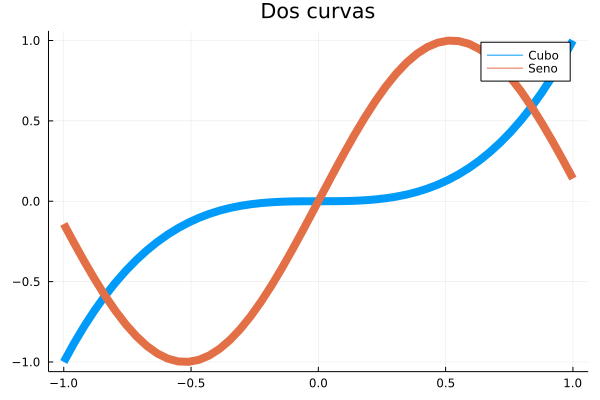

In [12]:
plt = plot(x, y, title = "Dos curvas", label = ["Cubo" "Seno"], lw = 8)
#lw = linewidth

#Nota: note que hemos escrito las leyendas como un vector fila (Es decir, como ["Cubo" "Seno"]
#en lugar de ["Cubo", "Seno"])
#Esta es la forma en la que plot acepta múltiples leyendas.

Equivalentemente, cada atributo puede cambiarse con una función modificatoria correspondiente que actúa sobre el gráfico activo. Por ejemplo, así podemos cambiar el título y agregar etiquetas a los ejes:

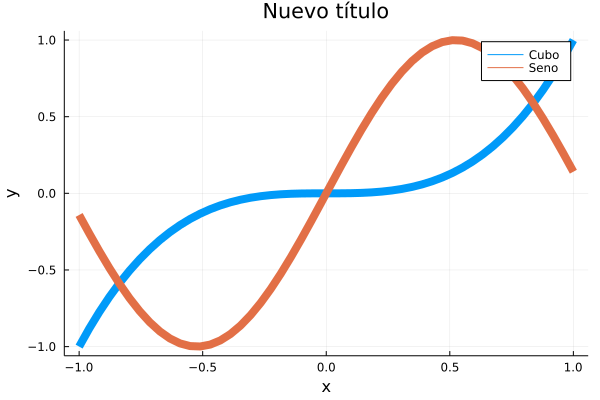

In [13]:
title!("Nuevo título")
xlabel!("x")
ylabel!("y")

También podemos ajustar los límites de los ejes:

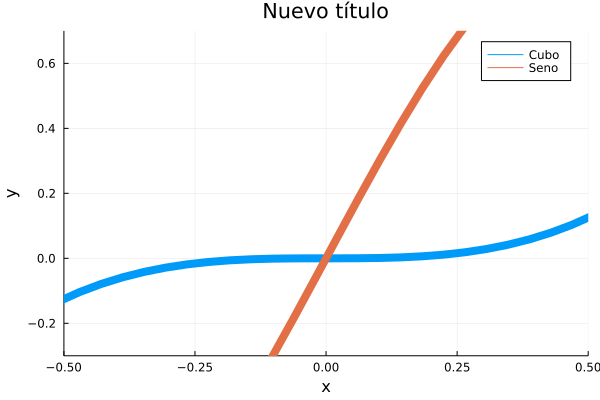

In [14]:
xlims!(-0.5,0.5)
ylims!(-0.3,0.7)

### Subgráficos

Por otro lado, podemos organizar los datos en subgráficos a través del atributo `layout=(M,N)`, que genera una grilla $M \times N$ de subgráficos y asigna las series de datos en forma automática a cada uno. Por ejemplo:

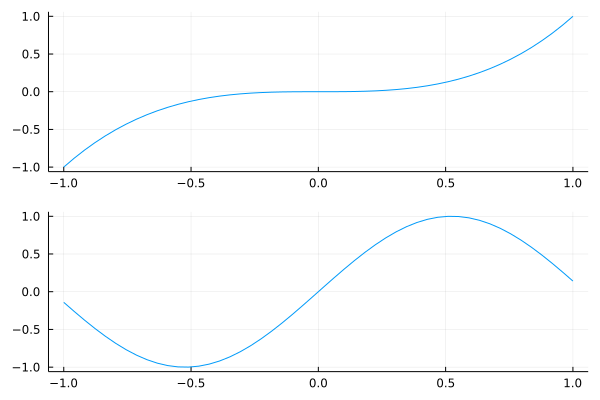

In [17]:
plot(x,y,layout=(2,1),label=false)  #2 filas y 1 columna

Distintos tipos de gráficos pueden combinarse en forma más compleja de la siguiente manera:

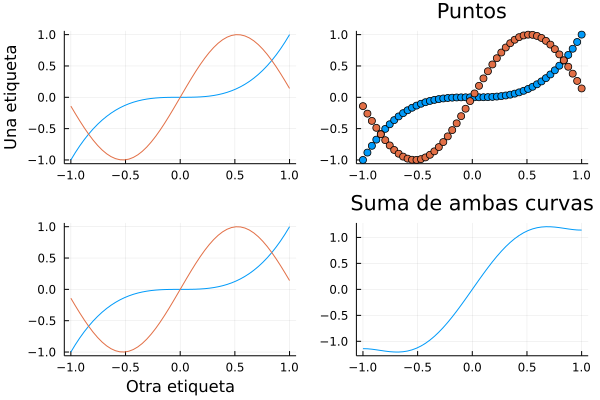

In [18]:
#Creamos los gráficos y los asignamos a distintas variables

p1 = plot(x,y, ylabel="Una etiqueta")
p2 = scatter(x,y,title="Puntos")
p3 = plot(x,y,xlabel="Otra etiqueta")
p4 = plot(x,y[:,1]+y[:,2],title="Suma de ambas curvas")

plt = plot(p1,p2,p3,p4,layout=(2,2),legend=false)



**Nota importante**: Fíjese que hemos guardado el retorno de la función plot en distintas variables (`p1`, `p2`, `p3`, `p4`  y `plt`). Las funciones `plot!`, `title!`, `xlim!` y demás aceptan como primer argumento estas variables, por lo que podemos modificar un gráfico en específico.


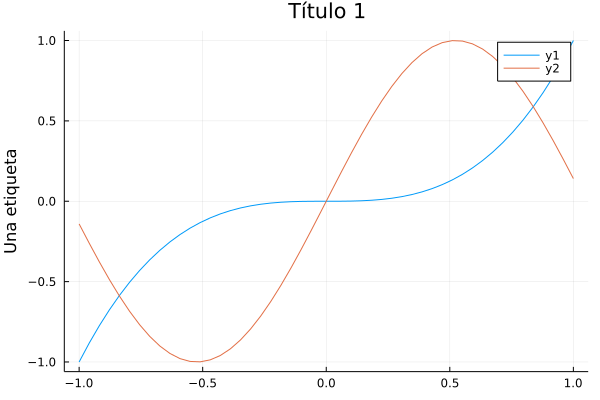

In [19]:
title!(p1, "Título 1")

## Histogramas
Mencionamos brevemente la función histogramas. La usaremos junto con el paquete `Distributions.jl`, que nos permite generar números aleatorios con distribuciones de probabilidad no aleatorias.

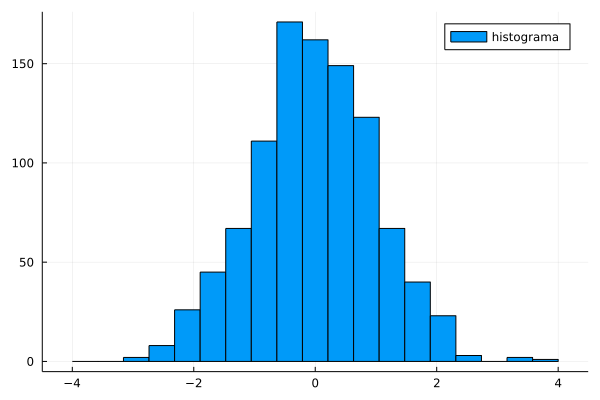

In [23]:
#using Pkg
#Pkg.add("Distributions")  #Probablemente necesiten instalar el paquete distribuciones
using Distributions
d = Normal()               #Crea una distribución normal aleatoria normal de media μ=0.0, σ=1.0
#=============================================
μ = 0.0
σ = 1.0
d = Normal(μ=μ.0,σ=σ)   #Sintaxis alternativa
==============================================#
μ = 0.0
σ = 1.0
x = rand(d, 1000)                                     #Genera 1000 números aleatorios con distribución d
bins = range(-4,stop = 4, length = 20)                #intervalos del histograma
hist =histogram(x, bins = bins, label = "histograma") #en bins podemos poner un número, y la función
                                                      #creará un histograma con una cantidad aproximada
                                                      #de intervalos.

### Cómo guardar las figuras ###

Podemos guardar las imágenes que generemos utilizando la función `savefig()`

In [24]:
savefig(plt, "imagen.png")

### Strings en LaTex

El paquete `LaTeXStrings` permite crear fórmulas en LaTeX como strings. Esto nos sirve para utilizar símbolos matemáticos en nuestras etiquetas y títulos. El uso es sencillo, simplemente escribimos la fórmula en Latex entre signos `$` dentro de un string precedido por una `L`. Por ejemplo, `L"$x^2$"` devuelve un string con el símbolo $x^2$.

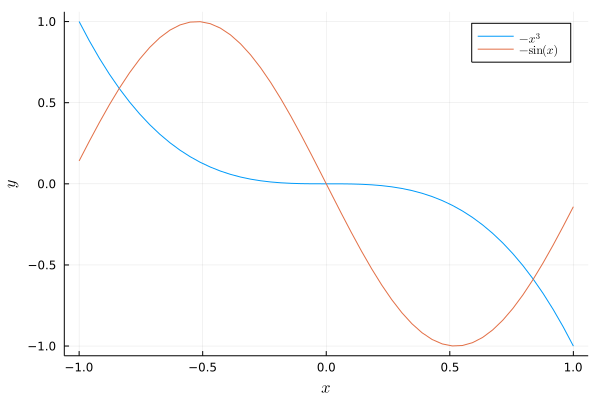

In [30]:
using LaTeXStrings

x = range(-1,1,length=50)   #El rango (-1,1) con 50 puntos equiespaciados
y = zeros(50,2)  # Creamos un arreglo de dos columnas lleno de ceros

y[:,1] = x.^3
y[:,2] = sin.(3*x)


plot(x,-y,label=[L"$-x^3$" L"$-\sin (x)$"])
xlabel!(L"$x$")
ylabel!(L"$y$")

## Animaciones

Podemos crear animaciones fácilmente con el macro `@animate` que devuelve un objeto Animación. Creamos los frames con una iteración y asignamos el objeto a una variable.

In [31]:
#Asignamos el macro a una variable

x = range(-π,π,length=100)

anim = @animate for t in range(0,2π,length=100)
    y = sin.(x.-t)
    plot(x,y,label=L"$\sin(x-t)$",ylim=(-1.1,1.1),xlabel=L"$x$")
    end

Animation("/tmp/jl_eK2OfP", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

Finalmente, vemos la animación con el comando `gif`. El atributo `fps` permite modificar la cantidad de frames por segundo.

┌ Info: Saved animation to 
│   fn = /home/pablo/Documentos/FaMAF/Cursos/curso-julia-2022-1-priv/Pablo/tmp.gif
└ @ Plots /home/pablo/.julia/packages/Plots/hxZ0l/src/animation.jl:114


Plots.AnimatedGif("/home/pablo/Documentos/FaMAF/Cursos/curso-julia-2022-1-priv/Pablo/tmp.gif")
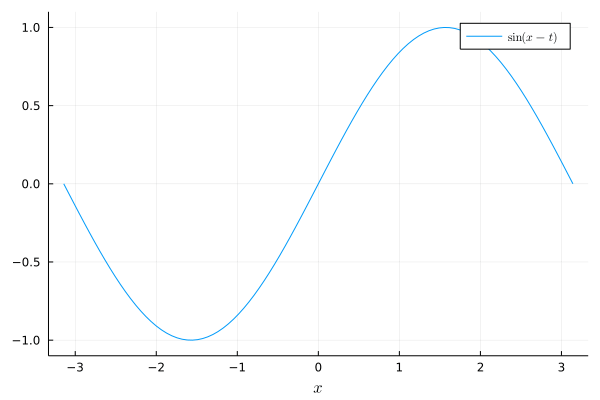

In [32]:
gif(anim,fps=30)

Opcionalmente podemos guardar la animación en un archivo como

┌ Info: Saved animation to 
│   fn = /home/pablo/Documentos/FaMAF/Cursos/curso-julia-2022-1-priv/Pablo/wave.gif
└ @ Plots /home/pablo/.julia/packages/Plots/hxZ0l/src/animation.jl:114


Plots.AnimatedGif("/home/pablo/Documentos/FaMAF/Cursos/curso-julia-2022-1-priv/Pablo/wave.gif")
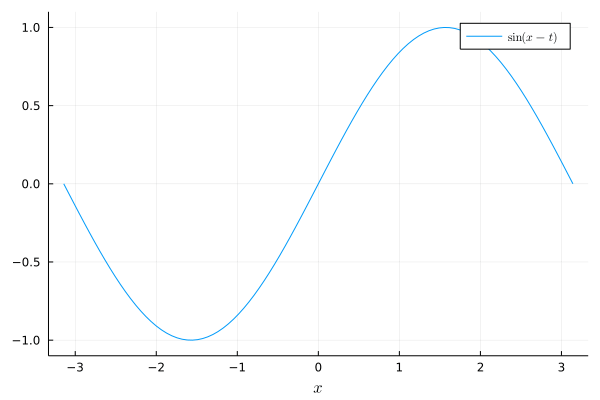

In [33]:
gif(anim,"wave.gif",fps=30)

## Backends ##

Como nota final mencionamos el concepto de _backends_. La librería plots tiene diversos _backends_ que cambian la forma en que la librería funciona
El backend más común y rápido es `GR`, y se activa por defecto. Otros comunes son `Plotly` y `PlotlyJS`, que son más interactivos, y `PyPlot`, que es una interfaz a la librería `matplotlib.pyplot`. Para activar `PlotlyJS` simplemente correremos la línea
```
plotlyjs()
```
Para activar `GR` podemos escribir `gr()`, para activar pyplot escribimos `pyplot()`, y de igual manera podemos activar otros. Mostraremos brevemente `PlotlyJS`.

In [34]:
#===================================================================================
using Pkg
Pkg.add("PlotlyJS")   #Probablemente deba instalar el backend antes de usarlo
                      #La primera vez que lo use puede tardar un rato en compilar
====================================================================================#

In [35]:
plotly()            #Cambiamos de backend


┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/pablo/.julia/packages/Plots/hxZ0l/src/backends.jl:432


Plots.PlotlyBackend()

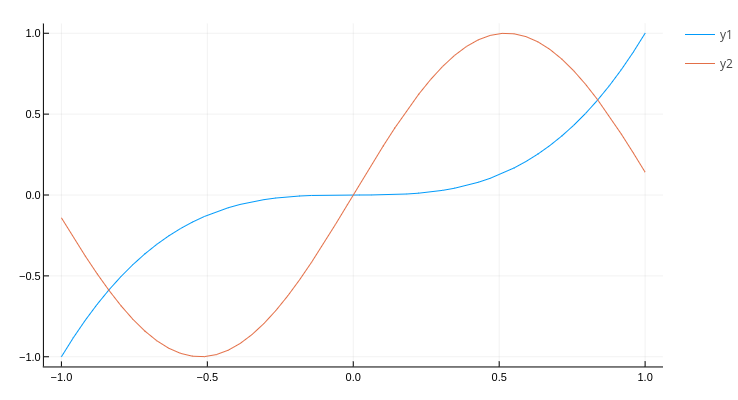

In [36]:
x = range(-1, stop = 1, length = 50)
y = zeros(50,2)  # Creamos un arreglo de dos columnas lleno de ceros

y[:,1] = x.^3
y[:,2] = sin.(3*x)

plt = plot(x,y)
#Si el gráfico no se muestra, puede que necesite instalar la extensión de plotly para
#jupyterlab, corriendo en una terminal la línea
#jupyter labextension install jupyterlab-plotly
#Si no logra hacerlo andar, no se preocupe. Con usar gr() es suficiente, pero sepa que existen
#otras formas de hacer 


`Plotly` es un poco más lento que `GR`, pero verá que es mucho más interactivo.